(2400, 1470)


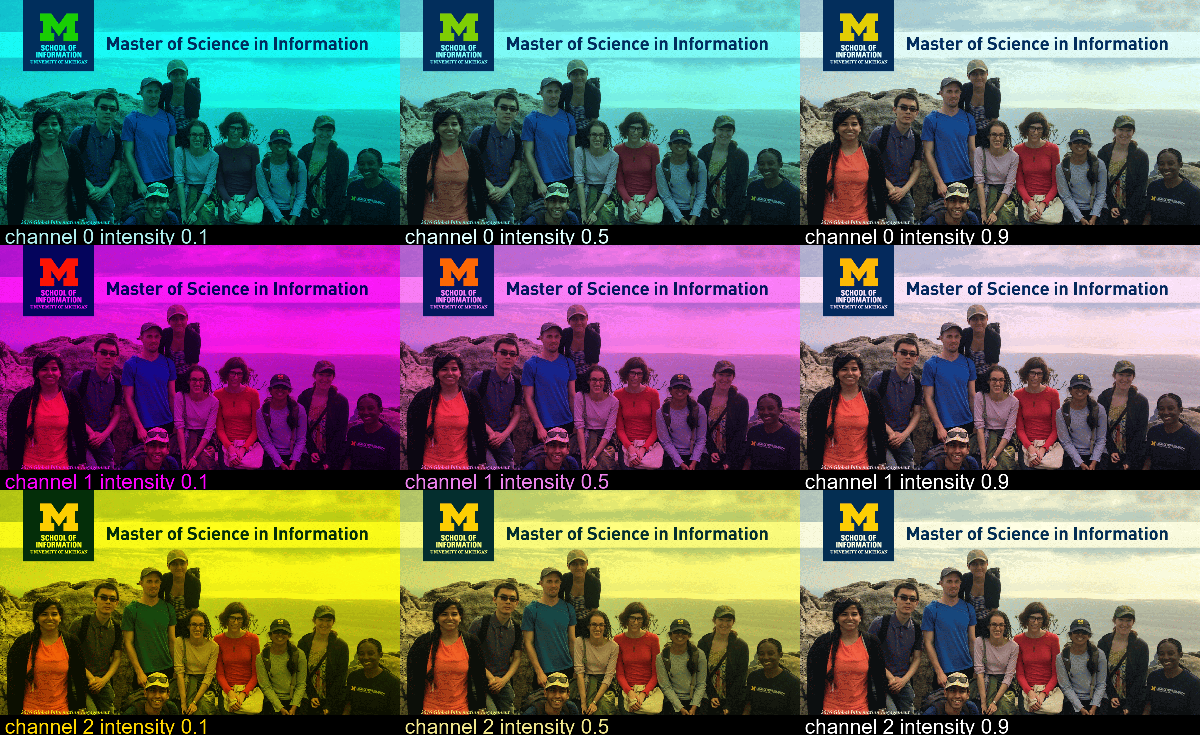

In [1]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw , ImageFont

def change_image(im,i,j,clr):
    (largeur, hauteur)= im.size
    for x in range(largeur):
        for y in range(hauteur):
            pixel = list(im.getpixel((x,y)))
            pixel[i]=int(pixel[i]*(0.1+0.4*j))
            pixel = tuple(pixel)
            im.putpixel((x,y),pixel)
            
    im_res=PIL.Image.new(im.mode, (im.width,im.height+40))
    new_im = Image.new('RGBA', (im.width,40),"black")
    
    im_res.paste(im,(0,0))
    im_res.paste(new_im,(0,im.width))
    
    text = "channel {} intensity {}".format(i,0.1+0.4*j)
    
    #draw = ImageDraw.Draw(new_im)
    draw = ImageDraw.Draw(im_res)
    
    fontsize = 41  # starting font size

    font = ImageFont.truetype("arial.ttf", fontsize)
    """while (font.getsize(text)[0] < im.size[0]) and (font.getsize(text)[1] < im.size[1]):
    # iterate until the text size is just larger than the criteria
        fontsize += 1
        font = ImageFont.truetype("arial.ttf", fontsize)

    # optionally de-increment to be sure it is less than criteria
    fontsize -= 1
    font = ImageFont.truetype("arial.ttf", fontsize)"""
    
    draw.text((10,im.height),text,fill=clr,font=font)
    
    """im_res.paste(im,(0,0))
    im_res.paste(new_im,(0,im.width))"""
    return im_res


# read image and convert to RGB
image=Image.open("C:/Users/ASUS/Desktop/coursera/msi_recruitment.gif")
image=image.convert('RGB')

#images= [image.copy() for i in range(9)]
clrs=["paleturquoise", "lightcyan", "white" , "fuchsia" , "violet" , "white" ,  "gold" , "khaki" , "white"]
k=0
images=[]
for i in range(3) :
    for j in range(3):
        image_changed=change_image(image.copy(),i,j,clrs[k])
        images.append(image_changed)
        k+=1
        
contact_sheet=PIL.Image.new(image.mode, (image.width*3,(image.height+40)*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+img.width == contact_sheet.width:
        x=0
        y=y+img.height
    else:
        x=x+img.width
        
    
print(contact_sheet.size)
# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)